In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)

## Importing Data Set

In [2]:
df = pd.read_csv('players.csv')
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


### Total number of rows and columns present in the data set

In [3]:
print('Total Rows present: ',df.shape[0])
print('Total Columns present: ',df.shape[1])

Total Rows present:  183978
Total Columns present:  42


## Treating Null Values

In [4]:
# Total 47301 Null values are present in different columns
df.isnull().sum().sum()

47301

In [5]:
# Missing values in each columns
df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [6]:
# Null values in percentage
df.isnull().sum()/df.shape[0]*100

id                     0.000000
player_fifa_api_id     0.000000
player_api_id          0.000000
date                   0.000000
overall_rating         0.454402
potential              0.454402
preferred_foot         0.454402
attacking_work_rate    1.755645
defensive_work_rate    0.454402
crossing               0.454402
finishing              0.454402
heading_accuracy       0.454402
short_passing          0.454402
volleys                1.474633
dribbling              0.454402
curve                  1.474633
free_kick_accuracy     0.454402
long_passing           0.454402
ball_control           0.454402
acceleration           0.454402
sprint_speed           0.454402
agility                1.474633
reactions              0.454402
balance                1.474633
shot_power             0.454402
jumping                1.474633
stamina                0.454402
strength               0.454402
long_shots             0.454402
aggression             0.454402
interceptions          0.454402
position

Text(0.5, 1.0, 'Missing Values in %')

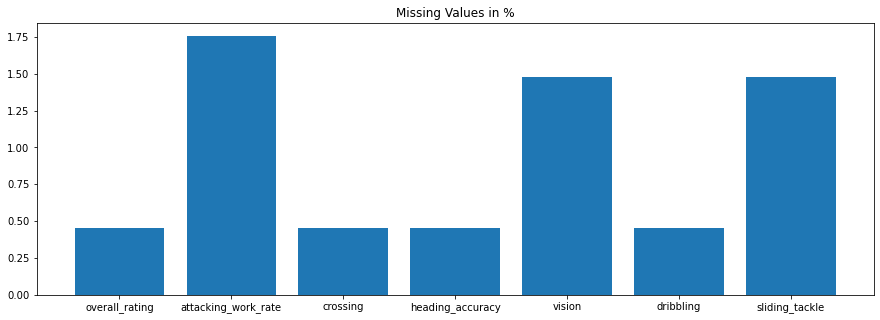

In [7]:
df1 = df[['overall_rating','attacking_work_rate','crossing','heading_accuracy','vision','dribbling','sliding_tackle']].isnull().sum().T/df.shape[0]*100
plt.figure(figsize=(15,5))
plt.bar(df1.index, df1)
plt.title('Missing Values in %')

### Removing rows which contains Null Values in Target Column (Overall Rating)

Target variable contains 836 null values, its better to remove those.

In [8]:
df = df.dropna(axis=0 , subset=['overall_rating'])
df.shape  # Current dimensions of Dataset

(183142, 42)

In [9]:
print('Total null values present in the dataset: ',df.isnull().sum().sum())

Total null values present in the dataset:  15533


### Removing Null values from Other columns

In [10]:
df = df.dropna(axis=0, subset=['volleys'])  
# Dropping all the rows contains Null values in 'volleys' columns
# since most of the columns contains null in same records

In [11]:
df.isnull().sum()

id                       0
player_fifa_api_id       0
player_api_id            0
date                     0
overall_rating           0
potential                0
preferred_foot           0
attacking_work_rate    911
defensive_work_rate      0
crossing                 0
finishing                0
heading_accuracy         0
short_passing            0
volleys                  0
dribbling                0
curve                    0
free_kick_accuracy       0
long_passing             0
ball_control             0
acceleration             0
sprint_speed             0
agility                  0
reactions                0
balance                  0
shot_power               0
jumping                  0
stamina                  0
strength                 0
long_shots               0
aggression               0
interceptions            0
positioning              0
vision                   0
penalties                0
marking                  0
standing_tackle          0
sliding_tackle           0
g

In [12]:
df['attacking_work_rate'].value_counts()

medium    125070
high       42823
low         8569
None        3317
norm         317
y             94
stoc          86
le            78
Name: attacking_work_rate, dtype: int64

In [13]:
df['attacking_work_rate'].mode()[0]

'medium'

In [14]:
# Imputing attacking_work_rate with mode i.e. 'Medium'
df.loc[ df['attacking_work_rate'].isnull() , 'attacking_work_rate' ] = df['attacking_work_rate'].mode()[0]

In [15]:
print('Total Missing values present now: ',df.isnull().sum().sum())

Total Missing values present now:  0


In [16]:
# Shape of the Data Set
df.shape

(181265, 42)

In [17]:
df = df.reset_index(drop=True)

## Removing Redundant Features

In [18]:
df = df.drop(columns=['id','player_fifa_api_id','player_api_id','date'])
df.head()

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [19]:
df.shape

(181265, 38)

## Creating Dummy columns for Categorical Variable

In [20]:
df['attacking_work_rate'].value_counts()

medium    125981
high       42823
low         8569
None        3317
norm         317
y             94
stoc          86
le            78
Name: attacking_work_rate, dtype: int64

In [21]:
df['defensive_work_rate'].value_counts()

medium    130846
high       27041
low        18432
o           1328
_0           911
1            421
2            334
ormal        317
3            243
5            231
7            207
0            188
6            179
9            143
4            116
es            94
tocky         86
ean           78
8             70
Name: defensive_work_rate, dtype: int64

In [22]:
pd.crosstab(df['attacking_work_rate'], df['defensive_work_rate'])

defensive_work_rate,0,1,2,3,4,5,6,7,8,9,_0,ean,es,high,low,medium,o,ormal,tocky
attacking_work_rate,,,,,,,,,,,,,,,,,,,
None,168,377,245,220,89,203,145,193,65,126,0,0,0,69,7,82,1328,0,0
high,11,9,13,0,0,17,13,5,0,4,0,0,0,7939,5727,29085,0,0,0
le,0,0,0,0,0,0,0,0,0,0,0,78,0,0,0,0,0,0,0
low,0,0,0,12,18,0,0,0,0,0,0,0,0,3319,695,4525,0,0,0
medium,9,35,76,11,9,11,21,9,5,13,911,0,0,15714,12003,97154,0,0,0
norm,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,317,0
stoc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86
y,0,0,0,0,0,0,0,0,0,0,0,0,94,0,0,0,0,0,0


Assuming some mistakes while taking data, it is assumed that some of the cataegories from attacking_work_rate is present in the defensive_work_rate like
* stoc - tockey --> stockey (a person who has short height but borad chest and shoulders)
* norm - ormal --> normal
* le - ean --> lean
* None - o --> None


In [23]:
# Changing Classes name in attacking_work_rate
df['attacking_work_rate'].replace({'le':'lean','norm':'normal','stoc':'stocky','y':'yes'}, inplace=True)

In [24]:
# Changing Classes name in attacking_work_rate
df['defensive_work_rate'].replace({'ean':'lean','ormal':'normal','tocky':'stocky','es':'yes','o':'None','_0':'medium'}, inplace=True)

In [25]:
# Imputing numeric classes to None
df.loc[ df['defensive_work_rate'].isin(list('0123456789')) , 'defensive_work_rate' ] = 'None'

In [26]:
df['attacking_work_rate'].value_counts()

medium    125981
high       42823
low         8569
None        3317
normal       317
yes           94
stocky        86
lean          78
Name: attacking_work_rate, dtype: int64

In [27]:
# All the classes have same name.
df['defensive_work_rate'].value_counts()

medium    131757
high       27041
low        18432
None        3460
normal       317
yes           94
stocky        86
lean          78
Name: defensive_work_rate, dtype: int64

In [28]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot_right,attacking_work_rate_high,attacking_work_rate_lean,attacking_work_rate_low,attacking_work_rate_medium,attacking_work_rate_normal,attacking_work_rate_stocky,attacking_work_rate_yes,defensive_work_rate_high,defensive_work_rate_lean,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_normal,defensive_work_rate_stocky,defensive_work_rate_yes
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [29]:
x = df.drop(columns='overall_rating')
y = df[['overall_rating']]

In [30]:
x_num = x.iloc[:,:-15]
x_cat = x.iloc[:,-15:]

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


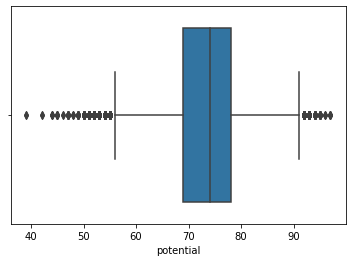

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


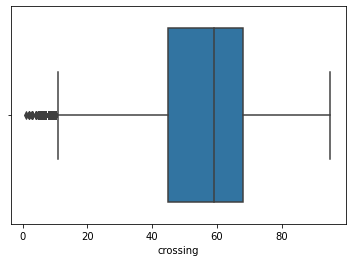

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


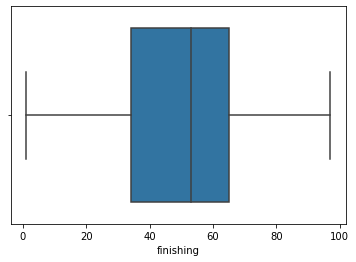

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


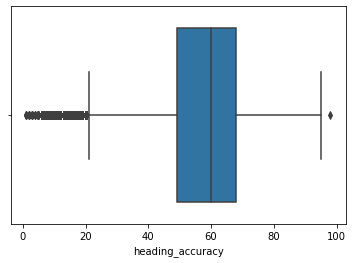

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


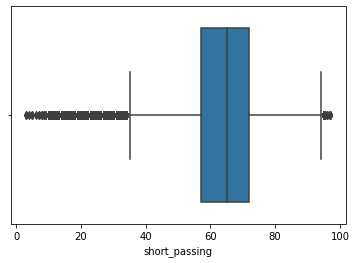

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


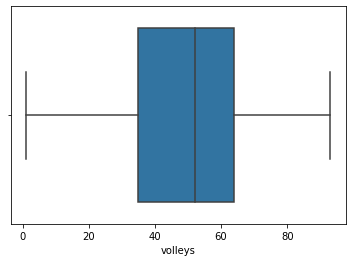

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


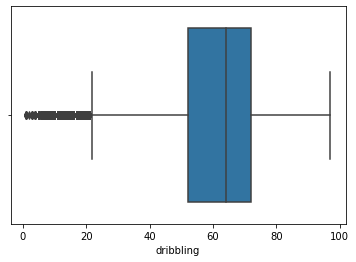

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


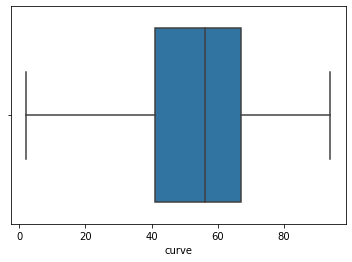

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


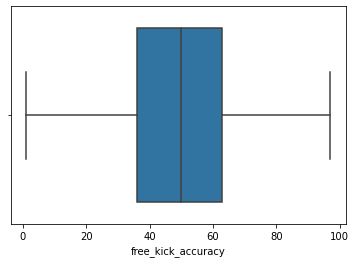

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


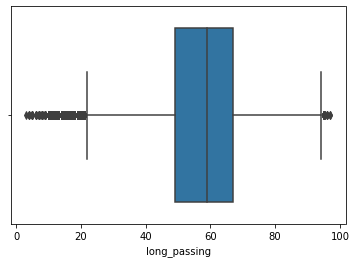

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


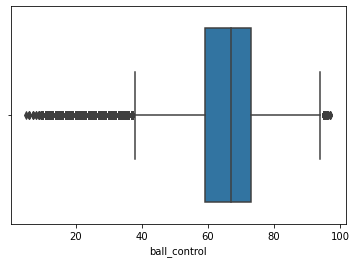

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


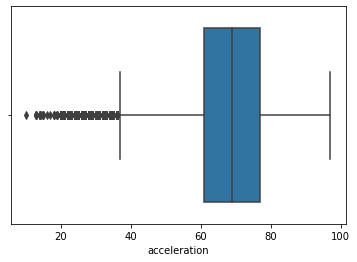

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


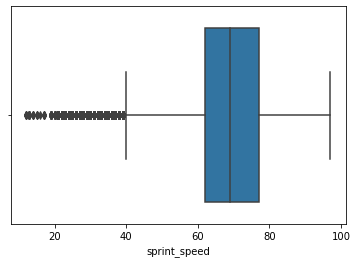

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


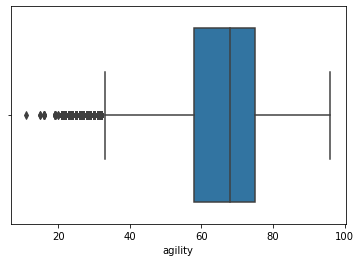

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


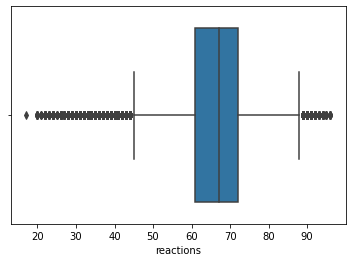

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


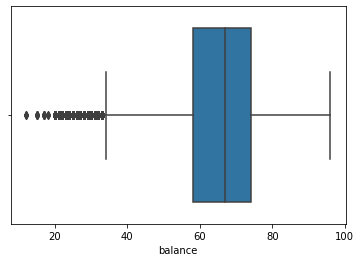

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


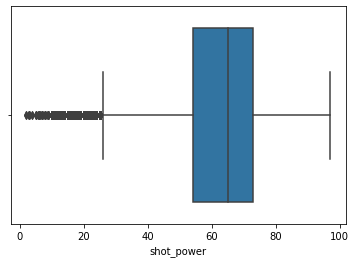

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


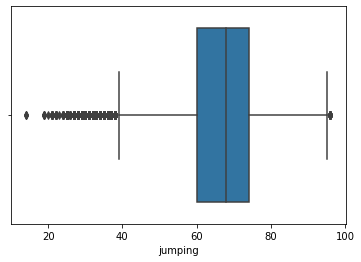

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


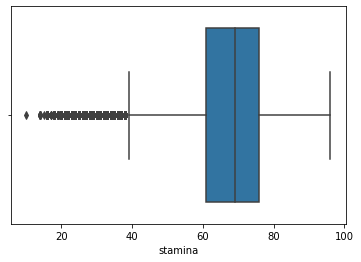

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


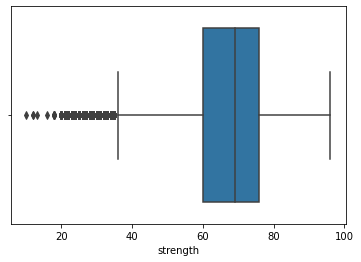

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


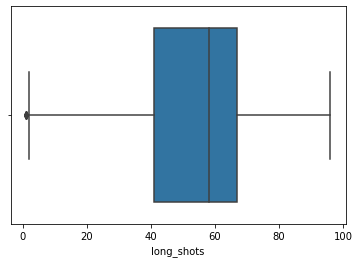

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


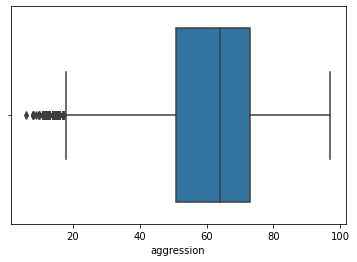

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


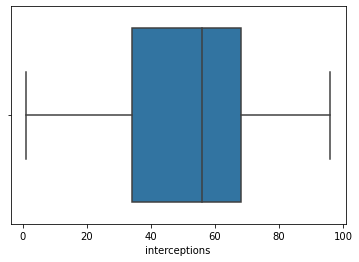

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


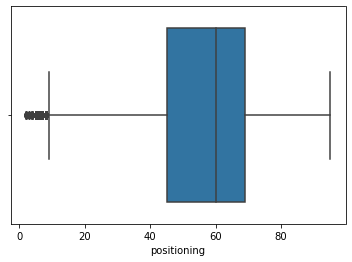

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


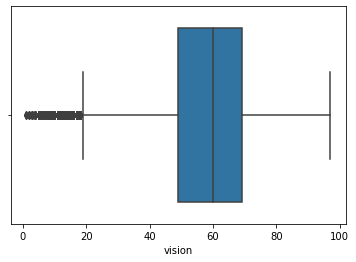

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


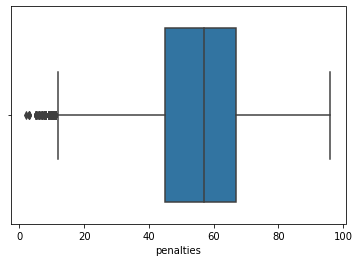

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


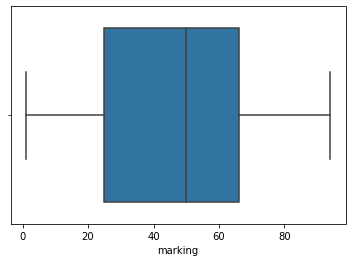

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


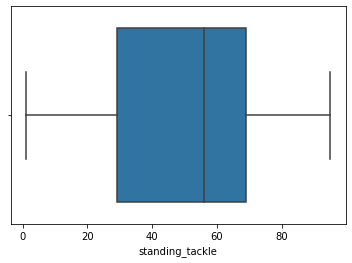

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


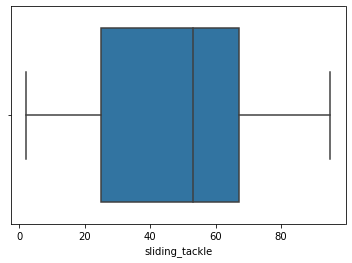

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


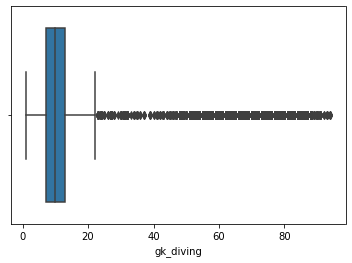

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


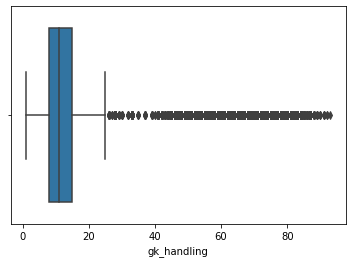

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


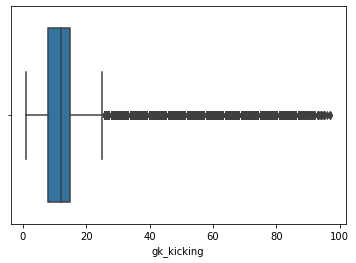

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


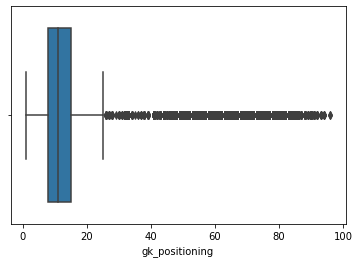

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


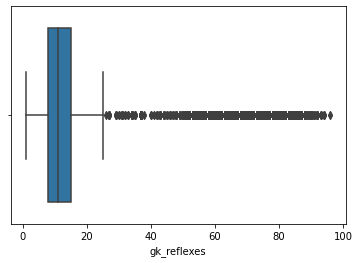

In [31]:
for i in x_num.columns:
    sns.boxplot(x_num[i])
    plt.show()

In [32]:
for i in x_num.columns:
    q1 = x_num[i].quantile(0.25)
    q3 = x_num[i].quantile(0.75)
    
    iqr = q3-q1
    
    ub = q3 + iqr*1.5
    lb = q1 - iqr*1.5
    
#     x_num.loc[ (x_num[i] > ub) , i] = x_num[i].quantile(0.99)
    x_num.loc[ (x_num[i] < lb) , i] = x_num[i].quantile(0.01)

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


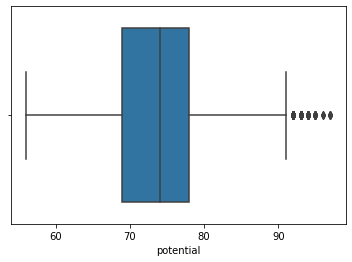

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


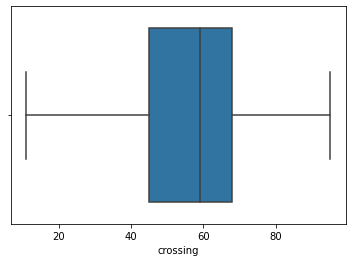

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


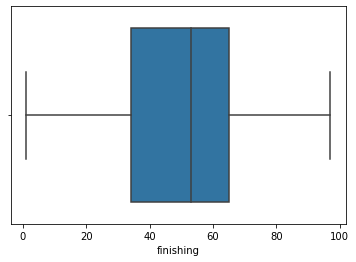

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


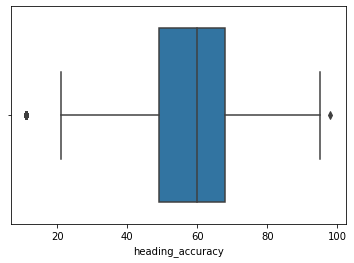

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


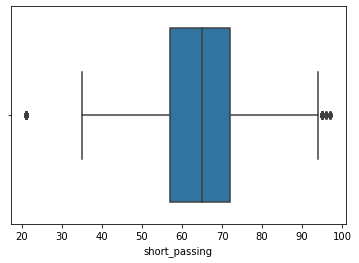

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


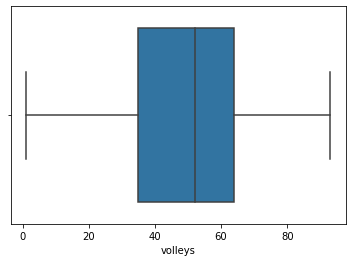

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


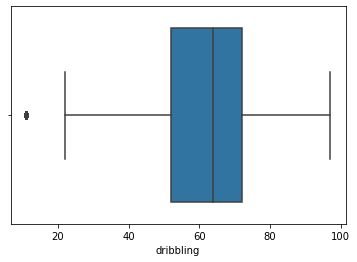

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


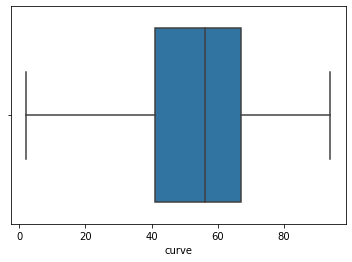

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


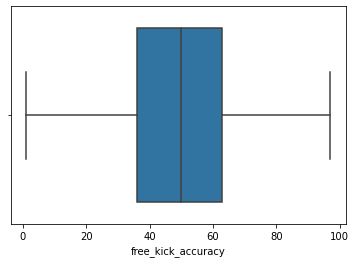

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


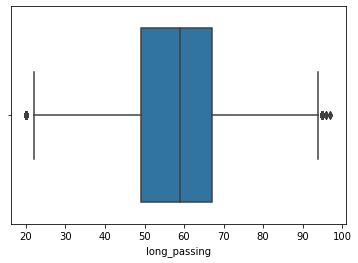

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


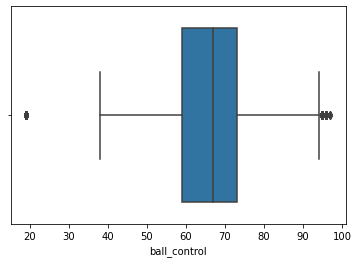

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


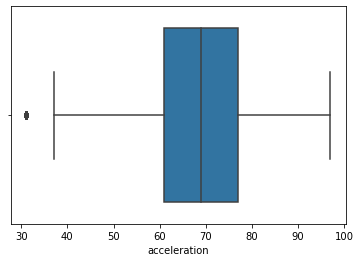

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


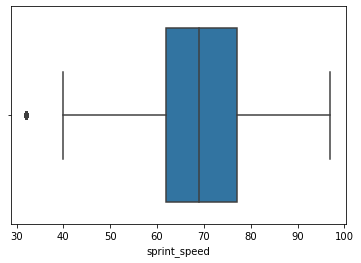

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


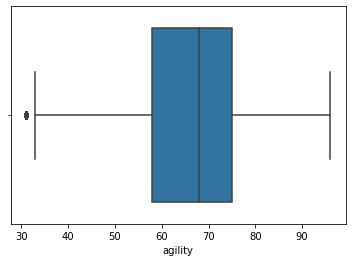

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


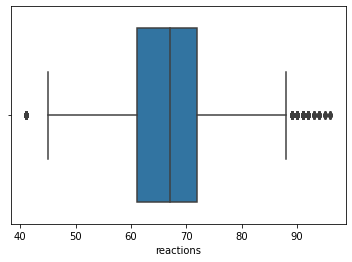

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


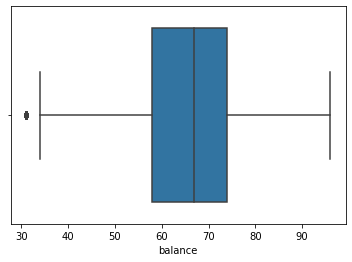

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


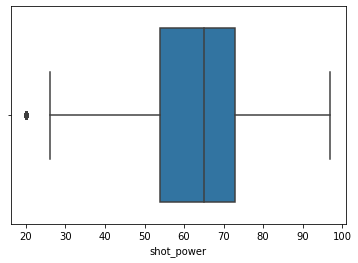

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


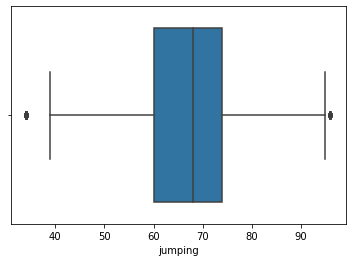

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


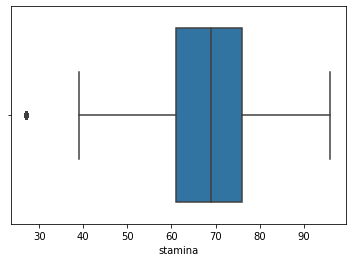

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


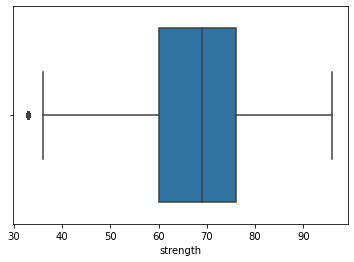

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


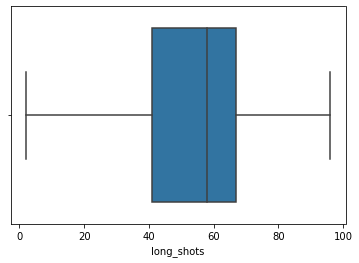

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


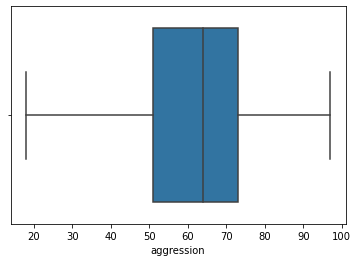

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


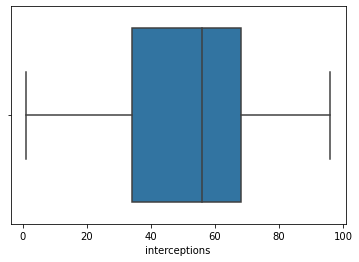

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


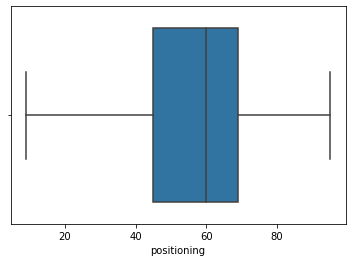

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


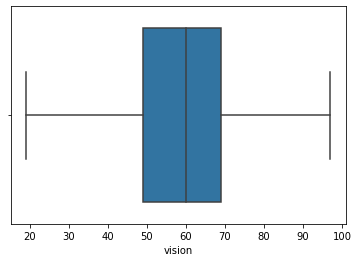

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


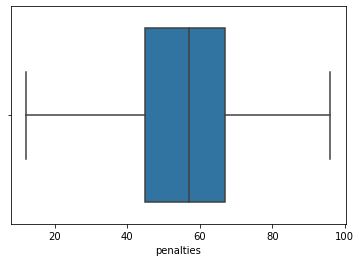

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


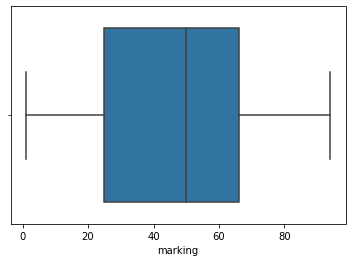

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


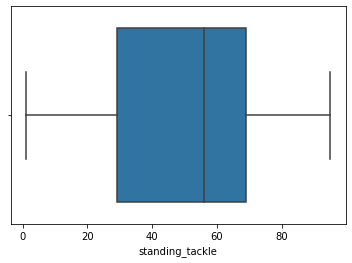

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


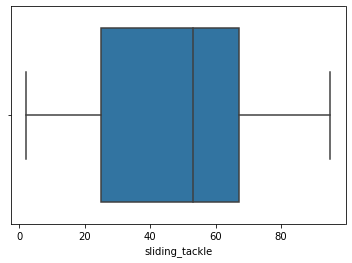

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


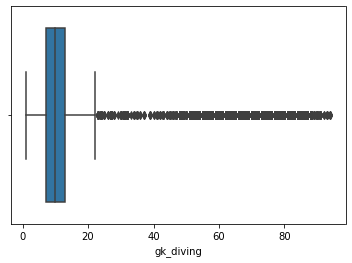

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


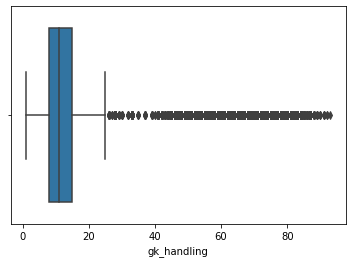

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


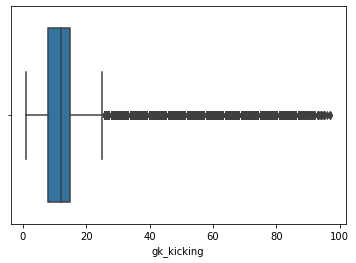

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


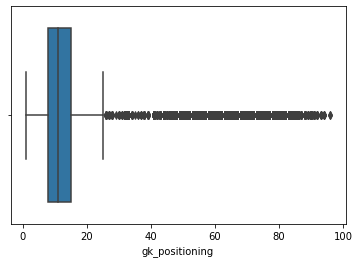

C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


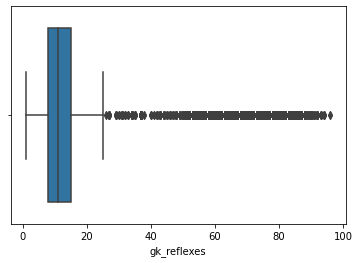

In [33]:
for i in x_num.columns:
    sns.boxplot(x_num[i])
    plt.show()

In [34]:
x = pd.concat([x_num, x_cat], axis=1)

## Creating a Base model

In [35]:
import statsmodels.api as sm

xc = sm.add_constant(x)
ols1 = sm.OLS(y, xc)
ols_mod = ols1.fit()

In [36]:
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                 2.181e+04
Date:                Mon, 01 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:33:26   Log-Likelihood:            -4.4222e+05
No. Observations:              181265   AIC:                         8.845e+05
Df Residuals:                  181219   BIC:                         8.850e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -3.9154      0.106    -36.843      0.000      -4.124      -3.707
potential                      0.3769      0.001    258.723      0.000       0.374       0.380
crossing                       0.0225      0.001     26.788      0.000       0.021       0.024
finishing                      0.0125      0.001     13.680      0.000       0.011       0.014
heading_accuracy               0.0667      0.001     82.598      0.000       0.065       0.068
short_passing                  0.0519      0.001     39.510      0.000       0.049       0.054
volleys                        0.0035      0.001      4.309      0.000       0.002       0.005
dribbling                     -0.0070      0.001     -6.300      0.000      -0.009      -0.005
curve                          0.0127      0.001     15.919      0.000       0.011       0.014
free_kick_accuracy             0.0131      0.001     18.446      0.000       0.012       0.014
long_passing                   0.0084      0.001      8.966      0.000       0.007       0.010
ball_control                   0.1183      0.001     80.898      0.000       0.115       0.121
acceleration                   0.0057      0.001      4.207      0.000       0.003       0.008
sprint_speed                   0.0115      0.001      8.923      0.000       0.009       0.014
agility                       -0.0075      0.001     -7.369      0.000      -0.009      -0.005
reactions                      0.2177      0.001    198.137      0.000       0.216       0.220
balance                        0.0082      0.001     10.435      0.000       0.007       0.010
shot_power                     0.0168      0.001     19.489      0.000       0.015       0.019
jumping                        0.0157      0.001     21.473      0.000       0.014       0.017
stamina                       -0.0045      0.001     -5.664      0.000      -0.006      -0.003
strength                       0.0632      0.001     75.015      0.000       0.062       0.065
long_shots                    -0.0147      0.001    -16.141      0.000      -0.016      -0.013
aggression                     0.0188      0.001     27.278      0.000       0.017       0.020
interceptions                  0.0105      0.001     14.379      0.000       0.009       0.012
positioning                   -0.0088      0.001    -11.171      0.000      -0.010      -0.007
vision                        -0.0032      0.001     -3.599      0.000      -0.005      -0.001
penalties                      0.0140      0.001     18.740      0.000       0.013       0.015
marking                        0.0318      0.001     28.497      0.000       0.030       0.034
standing_tackle                0.0051      0.001      3.972      0.000       0.003       0.008
sliding_tackle                -0.0263      

As we can see that p-value of mostly all the categorical features are more than 0.05 and value of condition no is around 10^16, which is showing high multicollinearity. Lets remove all these categorical features and their label encoding.

In [37]:
# Removing categorical features and their respective labels
x1 = x.iloc[:,:-15]

In [38]:
# Creating model again
xc = sm.add_constant(x1)
ols1 = sm.OLS(y, xc)
ols_mod = ols1.fit()

In [39]:
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                 2.832e+04
Date:                Mon, 01 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:33:28   Log-Likelihood:            -4.4369e+05
No. Observations:              181265   AIC:                         8.875e+05
Df Residuals:                  181230   BIC:                         8.878e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9475      0.095    -41.712      0.000      -4.133      -3.762
potential              0.3791      0.001    258.556      0.000       0.376       0.382
crossing               0.0217      0.001     25.876      0.000       0.020       0.023
finishing              0.0119      0.001     12.932      0.000       0.010       0.014
heading_accuracy       0.0678      0.001     83.390      0.000       0.066       0.069
short_passing          0.0512      0.001     38.746      0.000       0.049       0.054
volleys                0.0047      0.001      5.669      0.000       0.003       0.006
dribbling             -0.0090      0.001     -7.997      0.000      -0.011      -0.007
curve                  0.0122      0.001     15.296      0.000       0.011       0.014
free_kick_accuracy     0.0129      0.001     18.175      0.000       0.012       0.014
long_passing           0.0086      0.001      9.123      0.000       0.007       0.010
ball_control           0.1198      0.001     81.369      0.000       0.117       0.123
acceleration           0.0062      0.001      4.516      0.000       0.004       0.009
sprint_speed           0.0098      0.001      7.567      0.000       0.007       0.012
agility               -0.0074      0.001     -7.254      0.000      -0.009      -0.005
reactions              0.2199      0.001    198.797      0.000       0.218       0.222
balance                0.0091      0.001     11.498      0.000       0.008       0.011
shot_power             0.0169      0.001     19.419      0.000       0.015       0.019
jumping                0.0158      0.001     21.539      0.000       0.014       0.017
stamina               -0.0066      0.001     -8.449      0.000      -0.008      -0.005
strength               0.0655      0.001     77.196      0.000       0.064       0.067
long_shots            -0.0143      0.001    -15.628      0.000      -0.016      -0.013
aggression             0.0191      0.001     27.714      0.000       0.018       0.020
interceptions          0.0109      0.001     14.815      0.000       0.009       0.012
positioning           -0.0102      0.001    -12.923      0.000      -0.012      -0.009
vision                -0.0034      0.001     -3.850      0.000      -0.005      -0.002
penalties              0.0150      0.001     19.935      0.000       0.014       0.016
marking                0.0325      0.001     28.869      0.000       0.030       0.035
standing_tackle        0.0044      0.001      3.382      0.001       0.002       0.007
sliding_tackle        -0.0280      0.001    -25.353      0.000      -0.030      -0.026
gk_diving              0.1673      0.001    113.868      0.000       0.164       0.170
gk_handling            0.0323      0.002     16.759      0.000       0.028       0.036
gk_kicking            -0.0332      0.0

* Multicollineairy is decreased from 10^16 to 4650. Suggesting the categorical feature we removed have lower variance among them with higher correlation.

* All the features now have less than 0.05 p-value suggesting all these features are statistically significant.

## Cross Validation of Linear Regression Model

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

### Cross validation with all the features including categorical

In [41]:
lr = LinearRegression()
kf = KFold(n_splits= 5, shuffle = True)
mse = cross_val_score(lr, x, y, cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(abs(mse))
np.mean(rmse), np.std(rmse)

(2.7839949607630614, 0.011176475953345628)

### Cross validation without categorical features

In [42]:
lr = LinearRegression()
kf = KFold(n_splits= 5, shuffle = True)
mse = cross_val_score(lr, x1, y, cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(abs(mse))
np.mean(rmse), np.std(rmse)

(2.805006965191923, 0.010128700943119497)

<b> There is very little to no sign of overfitting <b>

<b>There is very limited effect of excluding categorical features. Bias error is increased by 0.02 and variance error decreases by 0.001. This may be due to the fact that the columns we have excluded are having higher amount of multicollinearity. <b>

## Fitting a Base Linear regression Model

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

### LR model with all features

In [44]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

In [45]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)

ytrain_pred = lr.predict(xtrain)
ytest_pred = lr.predict(xtest)

print('Train R2: ',r2_score(ytrain, ytrain_pred))
print('Test R2: ',r2_score(ytest, ytest_pred))

print('Train RMSE: ',mean_squared_error(ytrain, ytrain_pred)**0.5)
print('Test R2: ',mean_squared_error(ytest, ytest_pred)**0.5)

Train R2:  0.8445699992289595
Test R2:  0.8431251377052987
Train RMSE:  2.777695122749002
Test R2:  2.7697121269279275


### LR model without categorical features

In [46]:
xtrain, xtest, ytrain, ytest = train_test_split(x1, y, test_size=0.3, random_state=42)

In [47]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)

ytrain_pred = lr.predict(xtrain)
ytest_pred = lr.predict(xtest)

print('Train R2: ',r2_score(ytrain, ytrain_pred))
print('Test R2: ',r2_score(ytest, ytest_pred))

print('Train RMSE: ',mean_squared_error(ytrain, ytrain_pred)**0.5)
print('Test R2: ',mean_squared_error(ytest, ytest_pred)**0.5)

Train R2:  0.8420593072224918
Test R2:  0.840497686487108
Train RMSE:  2.8000395840664027
Test R2:  2.792810361595036


<b> R2- score and RMSE of train and test data are almost equal inferencing that the model is not overfit. <b>

## Regularization

In [48]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

### Scaling the dat before regularization

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
st = StandardScaler()
x1 = pd.DataFrame(st.fit_transform(x1) , columns=x1.columns)

### Ridge Regularization

In [51]:
rid = Ridge()
param = {'alpha':[0.00005,0.00008,0.0001,0.001,0.01,0.1,0.5,1,2,3,4,5,6,7,8,9,10,20,30]}

grid = GridSearchCV(rid, param_grid=param, cv=5, scoring='neg_mean_squared_error' )

rid_mod=grid.fit(x1,y)

print(rid_mod.best_params_)
print(abs(rid_mod.best_score_))

{'alpha': 30}
7.868100784155791


In [52]:
rid = Ridge(**rid_mod.best_params_)
mse = cross_val_score(rid, x, y, cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(abs(mse))
np.mean(rmse), np.std(rmse)

(2.7837663615494197, 0.011094704462867746)

### Lasso Regularization

In [53]:
las = Lasso()
param = {'alpha':[0.00005,0.0008,0.0001,0.001,0.01,0.1,0.5,1,2,3,4,5,6,7,8,9,10,20,30]}

grid = GridSearchCV(las, param_grid=param, cv=5, scoring='neg_mean_squared_error' )

las_mod=grid.fit(x1,y)

print(las_mod.best_params_)
print(abs(las_mod.best_score_))

{'alpha': 5e-05}
7.868168885925712


In [54]:
las = Lasso(**las_mod.best_params_)
mse = cross_val_score(las, x, y, cv=5, scoring='neg_mean_squared_error')
rmse = np.sqrt(abs(mse))
np.mean(rmse), np.std(rmse)

C:\Users\Divyajeet\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1203.4727385763545, tolerance: 723.1814390505625
  positive)


(2.783866110632283, 0.011113422230659949)

## Principal Component Analysis

### Splitting in test and train

In [68]:
from sklearn.model_selection import train_test_split

In [172]:
xtrain, xtest, ytrain, ytest = train_test_split(x1, y, test_size=0.3, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((126885, 34), (54380, 34), (126885, 1), (54380, 1))

### Scaling of Original Features

In [179]:
st = StandardScaler()

xtrain = pd.DataFrame(st.fit_transform(xtrain), columns = xtrain.columns)

xtest = pd.DataFrame(st.transform(xtest), columns = xtest.columns)

xtrain.head()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,0.841822,1.096358,1.054880,0.707694,0.324597,0.743081,1.372446,1.207476,0.653186,0.551547,0.980163,1.330148,0.867905,0.932097,0.312038,1.292984,0.812357,-0.090840,0.886514,0.628713,0.797116,-1.182488,-0.356903,1.097616,0.870617,1.033397,-0.555207,-0.993782,-0.696877,-0.338457,-0.566696,-0.596350,-0.003540,-0.021503
1,-1.910544,-1.342898,-1.362834,-0.309851,-1.403724,-1.504277,-1.597022,-1.642120,-0.245092,-1.333591,-2.678173,-0.205329,-0.004997,-1.318502,-2.017662,-0.479277,-1.337249,0.365465,-0.647824,-0.540371,-1.542118,0.436806,0.310297,-1.449402,-1.732389,-1.223553,0.527762,0.540329,0.598994,-0.457057,-0.503593,-0.690502,-0.127930,-0.544531
2,0.536003,-0.007115,-0.469331,0.468271,-0.140720,-0.572446,-0.717180,-0.272122,0.372474,-0.216472,-0.239283,0.715957,-0.322416,-0.232006,-0.797343,0.676545,-0.538824,-0.182101,0.228941,0.712219,-0.127697,0.748209,0.515589,0.880848,0.002948,0.130617,0.669019,0.958723,0.506432,-0.457057,0.316754,1.522063,0.307432,0.269069
3,1.453459,1.038280,0.529290,-0.549273,0.856388,0.359386,1.152485,0.659477,0.147905,0.411907,1.041135,1.330148,0.867905,1.242525,0.755790,1.061819,-0.293155,0.000421,0.521196,-2.377504,-0.073297,-0.995646,0.772204,0.772465,0.937361,0.195101,0.810276,0.912235,1.061805,-0.101256,-0.061867,-0.502199,-0.190124,-0.428302
4,0.841822,-0.239425,1.054880,-0.429562,0.125175,1.455657,0.877535,0.275878,-0.974943,-1.263771,0.736274,1.406921,1.582098,1.009704,1.088604,0.984765,0.996609,0.821770,0.813451,0.879231,1.123520,1.308734,-1.691304,0.989232,0.937361,-0.320773,-1.402749,-0.947294,-0.743158,-0.041955,-0.188074,-0.643426,-0.563291,-0.137731


### Creating covariance matrix

In [174]:
cov_matrix =  np.cov(xtrain.T)  # We use transpose, because np.cov function will by default take rows for finding covariance
cov_matrix.shape

(34, 34)

### Eigen Values and Eigen Vectors

In [175]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix) 
eig_vals.shape, eig_vecs.shape

((34,), (34, 34))

In [181]:
# Array of eigen values. But this is not in sorted order.
eig_vals

array([15.61851576,  5.52612424,  2.6126341 ,  1.91242708,  1.54133722,
        0.7978193 ,  0.67199495,  0.56188824,  0.45491045,  0.39633581,
        0.36696176,  0.32293978,  0.31125896,  0.28845337,  0.28142193,
        0.24376389,  0.03231196,  0.03382161,  0.03905587,  0.04911375,
        0.05598123,  0.05956025,  0.08573219,  0.09013168,  0.10376699,
        0.12734935,  0.13162569,  0.22754096,  0.20861419,  0.15088205,
        0.16236346,  0.18555935,  0.17272657,  0.17534398])

In [182]:
# Fetching eigen values and their cooresponding eigen vectors so that we can later sort them on the basis of eigen values

# Fetching eigen vector. they are columns
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(eig_vecs.shape[0])]

In [183]:
eigen_pairs_sorted=sorted(eigen_pairs,reverse=True)
eigen_pairs_sorted

[(15.618515756485445,
  array([-0.08998463, -0.21493193, -0.18562461, -0.1554181 , -0.2295208 ,
         -0.19539975, -0.22753425, -0.20950485, -0.19454857, -0.17939705,
         -0.24018989, -0.1700249 , -0.16781214, -0.16401791, -0.11337284,
         -0.14410383, -0.2097918 , -0.03167164, -0.17687245, -0.01507689,
         -0.21214999, -0.1155355 , -0.0897136 , -0.20464315, -0.19980461,
         -0.18300913, -0.06875014, -0.08495348, -0.07745037,  0.20245921,
          0.20074366,  0.12797255,  0.20133926,  0.20220685])),
 (5.526124237841918,
  array([ 0.04295314,  0.0221313 ,  0.21122749, -0.18575197, -0.05100421,
          0.17041593,  0.11219489,  0.10537602,  0.07917576, -0.09705304,
          0.02130662,  0.12766168,  0.09779992,  0.1783517 ,  0.00874488,
          0.09797408,  0.0414758 , -0.09141332, -0.11399561, -0.22217547,
          0.11282753, -0.27978947, -0.32943998,  0.13881819,  0.07680064,
          0.1101594 , -0.37925797, -0.37361932, -0.36854314,  0.10344062,
     

### Cumulative sum of eigen values

In [185]:
# Total sum of eigen value
tot = sum(eig_vals)

# List contain percenatage wise eigen value contain
var_exp = [round(( i /tot )*100,3) for i in sorted(eig_vals, reverse=True)]
print('Variance of each eigen vector:\n',var_exp)

# List contains cumulative eigen value for each eigen vector starting from the first eigen vector's eigen value
cum_var_exp = np.cumsum(var_exp)
print("\nCumulative Variance Explained", cum_var_exp)
# The last 4 features are contributing very less amount, similar to 1.4% of total variance

Variance of each eigen vector:
 [45.936, 16.253, 7.684, 5.625, 4.533, 2.347, 1.976, 1.653, 1.338, 1.166, 1.079, 0.95, 0.915, 0.848, 0.828, 0.717, 0.669, 0.614, 0.546, 0.516, 0.508, 0.478, 0.444, 0.387, 0.375, 0.305, 0.265, 0.252, 0.175, 0.165, 0.144, 0.115, 0.099, 0.095]

Cumulative Variance Explained [ 45.936  62.189  69.873  75.498  80.031  82.378  84.354  86.007  87.345
  88.511  89.59   90.54   91.455  92.303  93.131  93.848  94.517  95.131
  95.677  96.193  96.701  97.179  97.623  98.01   98.385  98.69   98.955
  99.207  99.382  99.547  99.691  99.806  99.905 100.   ]


C:\Users\Divyajeet\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

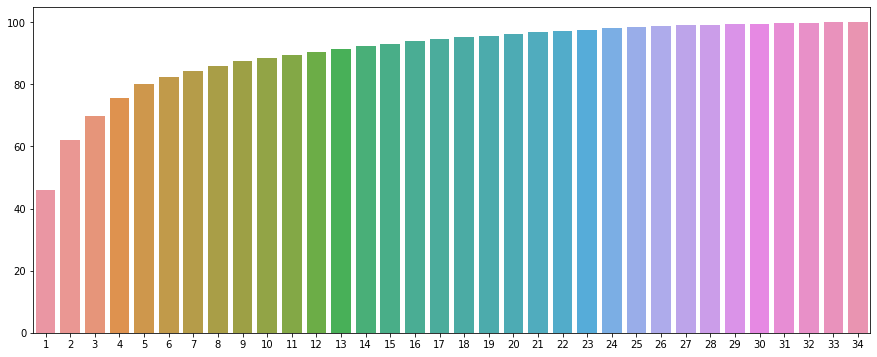

In [189]:
plt.figure(figsize=(15,6))
sns.barplot(np.arange(1,cum_var_exp.shape[0]+1) , cum_var_exp)

Around 18 PCA are able to explain 95% of the total variance.

### Extracting Eigen values and eigen vector back

In [192]:
# Extract the eigenvalues and eigenvectors from the eigen pair (sorted)
eigvalues_sort = [eigen_pairs_sorted[j][0] for j in range(len(eig_vals))]
eigvectors_sort = [eigen_pairs_sorted[j][1] for j in range(len(eig_vals))]

# Here the aigen vectors are row wise. we have to again change them to columns-wise

In [193]:
eigvectors_sort

[array([-0.08998463, -0.21493193, -0.18562461, -0.1554181 , -0.2295208 ,
        -0.19539975, -0.22753425, -0.20950485, -0.19454857, -0.17939705,
        -0.24018989, -0.1700249 , -0.16781214, -0.16401791, -0.11337284,
        -0.14410383, -0.2097918 , -0.03167164, -0.17687245, -0.01507689,
        -0.21214999, -0.1155355 , -0.0897136 , -0.20464315, -0.19980461,
        -0.18300913, -0.06875014, -0.08495348, -0.07745037,  0.20245921,
         0.20074366,  0.12797255,  0.20133926,  0.20220685]),
 array([ 0.04295314,  0.0221313 ,  0.21122749, -0.18575197, -0.05100421,
         0.17041593,  0.11219489,  0.10537602,  0.07917576, -0.09705304,
         0.02130662,  0.12766168,  0.09779992,  0.1783517 ,  0.00874488,
         0.09797408,  0.0414758 , -0.09141332, -0.11399561, -0.22217547,
         0.11282753, -0.27978947, -0.32943998,  0.13881819,  0.07680064,
         0.1101594 , -0.37925797, -0.37361932, -0.36854314,  0.10344062,
         0.10904642,  0.07668059,  0.10637821,  0.10677399]),


In [196]:
# Eigen vectors columns wise
eig_vect =  np.array(eigvectors_sort).transpose()
eig_vect

array([[-8.99846347e-02,  4.29531397e-02,  3.95214494e-01, ...,
        -5.61504497e-03,  6.91980957e-04, -1.42985155e-03],
       [-2.14931930e-01,  2.21312960e-02,  4.09781510e-02, ...,
         3.38065911e-02, -2.98926211e-04, -1.06200639e-02],
       [-1.85624609e-01,  2.11227490e-01, -3.39031702e-03, ...,
        -3.63468980e-03,  3.41953835e-03, -5.09766192e-03],
       ...,
       [ 1.27972552e-01,  7.66805911e-02,  3.52700341e-01, ...,
         4.36221901e-02, -9.70805953e-03,  5.38221913e-02],
       [ 2.01339261e-01,  1.06378210e-01,  3.09653778e-01, ...,
         3.90429842e-02,  7.09433109e-01,  3.30746176e-01],
       [ 2.02206852e-01,  1.06773989e-01,  3.08226885e-01, ...,
        -8.38239563e-02,  3.09132710e-02, -8.66333038e-01]])

Since we got our eigen vectors for PCA, we can check that which original feature is given most importance for PCA1

### Top 5 features impacting PCA1

In [201]:
feat_importance =  pd.DataFrame({'feature':xtrain.columns , 'PCA1_weight':eig_vect[:,0], 'PCA1_abs':abs(eig_vect[:,0])})
feat_importance.sort_values(by='PCA1_abs', ascending=False).head()

,feature,PCA1_weight,PCA1_abs
10,ball_control,-0.240190,0.240190
4,short_passing,-0.229521,0.229521
6,dribbling,-0.227534,0.227534
1,crossing,-0.214932,0.214932
20,long_shots,-0.212150,0.212150


### Transforming data in PCA space.

In [216]:
xtrain_pca = np.dot(xtrain, eig_vect)

xtest_pca = np.dot(xtest, eig_vect)

xtrain_pca[0]  # Values of 1st record on PCA scale.

array([-3.61905911,  2.47866668,  0.34270108,  0.06127944,  0.64656724,
        0.29208221,  0.25026785,  0.0670028 ,  0.05773125,  0.58907415,
        0.1902463 , -0.39683313, -0.25878998,  0.46292949,  1.23130356,
        0.16371042,  0.28899747,  0.43768136,  0.27343957, -0.09731527,
        0.01596933, -0.73868431,  0.26921172, -0.02229451, -0.09696828,
       -0.05727352, -0.49196716, -0.23384362, -0.08055713, -0.05642752,
       -0.17227232, -0.36136215,  0.42019134, -0.23348673])

### Importing PCA

In [203]:
from sklearn.decomposition import PCA

In [220]:
pc = PCA()
xtr_pca = pc.fit_transform(xtrain)
xtt_pca = pc.transform(xtest)
xtr_pca[0]

array([-3.61905911, -2.47866668,  0.34270108, -0.06127944, -0.64656724,
        0.29208221,  0.25026785, -0.0670028 ,  0.05773125,  0.58907415,
        0.1902463 ,  0.39683313,  0.25878998, -0.46292949, -1.23130356,
       -0.16371042, -0.28899747,  0.43768136,  0.27343957,  0.09731527,
        0.01596933,  0.73868431,  0.26921172,  0.02229451,  0.09696828,
        0.05727352,  0.49196716,  0.23384362, -0.08055713, -0.05642752,
       -0.17227232,  0.36136215, -0.42019134, -0.23348673])

`As we can see that`, values of the record using manual calculation and using PCA are exactly same.

### Creating LR model

#### Using all PCA Model

In [224]:
lr = LinearRegression()
lr.fit(xtrain_pca, ytrain)

ytrain_pred = lr.predict(xtrain_pca)
ytest_pred = lr.predict(xtest_pca)

print('Train R2: ',r2_score(ytrain, ytrain_pred))
print('Test R2: ',r2_score(ytest, ytest_pred))

print('Train RMSE: ',mean_squared_error(ytrain, ytrain_pred)**0.5)
print('Test R2: ',mean_squared_error(ytest, ytest_pred)**0.5)

Train R2:  0.8420593072224918
Test R2:  0.840497686487108
Train RMSE:  2.8000395840664027
Test R2:  2.792810361595036


#### Using only 18 PCA components

In [231]:
lr = LinearRegression()
lr.fit(xtrain_pca[:,:18], ytrain)

ytrain_pred = lr.predict(xtrain_pca[:,:18])
ytest_pred = lr.predict(xtest_pca[:,:18])

print('Train R2: ',r2_score(ytrain, ytrain_pred))
print('Test R2: ',r2_score(ytest, ytest_pred))

print('Train RMSE: ',mean_squared_error(ytrain, ytrain_pred)**0.5)
print('Test R2: ',mean_squared_error(ytest, ytest_pred)**0.5)

Train R2:  0.8277872643410716
Test R2:  0.8262290575208309
Train RMSE:  2.923814291131864
Test R2:  2.915053515156587


### Conclusion
#### After using regularization and PCA the result is not getting improve, since the already the model is very rightly fit.